# 離散分布描画

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
from scipy.stats import norm
from scipy.stats import lognorm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set();

Duplicate key in file PosixPath('/opt/conda/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 758 ('font.family : IPAexGothic')


In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

class ToolBox:

  def combination(total, chosen):
      return math.factorial(total) / math.factorial(chosen)/ math.factorial(total-chosen)

class BinomialDistribution:
  """
  　全試行回数nと成功確率pの二項分布オブジェクトを生成する.

    Attributes
    ----------
    total : int
      全試行回数n.
    p_of_sccess : float
      一回の試行における成功確率p.
    p_of_fail : float
      一回の試行における失敗確率1-p.
  """

  def __init__(self, total, p_of_success):
    """
    Parameters
    ----------
    total : int
        全試行回数n.
    p_of_success : float
        一回の試行における成功確率p.
    """
    assert total > 0, "Condition error: 0 <= total"
    assert p_of_success >= 0 and p_of_success <= 1, "Condition error: 0 <= p_of_success <= 1"

    self.total = total
    self.p_of_sccess = p_of_success
    self.p_of_fail = 1 - p_of_success

  def get_probability_mass(self, success):
    """
    x回成功する確率質量を求める

    Parameters
    ----------
    success : int
        成功回数x.

    Returns
    -------
    probability_mass : float
        xの確率質量.
    """
    assert success >= 0 and success <= self.total, "Condition error: 0 <= sccuess <= total"

    fail = self.total - success
    combination = ToolBox.combination(self.total, success)
    probability_mass = combination * (self.p_of_sccess ** success) * (self.p_of_fail) ** fail
    return probability_mass

  def get_lower_culmitive_distribution(self, success):
    """
    xの下側累積確率(0〜x回の確率質量の和)を求める.

    Parameters
    ----------
    success : int
        成功回数x.

    Returns
    -------
    result : float
        xの下側累積確率.
    """
    result = 0
    for i in range (0, success + 1):
      result += binomial_distribution.get_probability_mass(i)
    return result

  def get_upper_culmitive_distribution(self, success):
    """
    xの上側累積確率(x〜全試行回数の確率質量の和、)を求める.

    Parameters
    ----------
    success : int
        成功回数x.

    Returns
    -------
    result : float
        xの上側累積確率.
    """
    result = 0
    for i in range (success, self.total + 1):
      result += binomial_distribution.get_probability_mass(i)
    return result

  def draw_graph(self):
    """
    グラフを描画してpng形式で保存する.
    """
    x = np.arange(0, self.total + 1, 1)
    y = []
    for i in range(0, self.total + 1):
      y.append(self.get_probability_mass(i))
    plt.plot(x, y)
    plt.xlim(0,20)
    plt.ylim(0,1)
    plt.show()

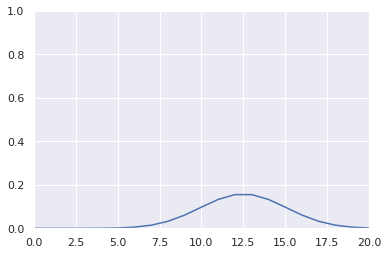

In [3]:
# 全試行回数10回、成功確率0.5の二項分布オブジェクトを作成する.
binomial_distribution = BinomialDistribution(25, 0.5)

# この二項分布のグラフを描画する.
binomial_distribution.draw_graph()

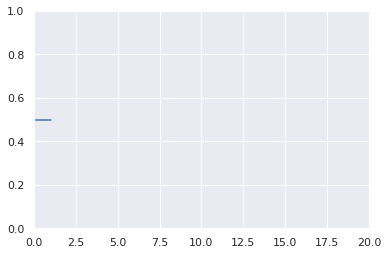

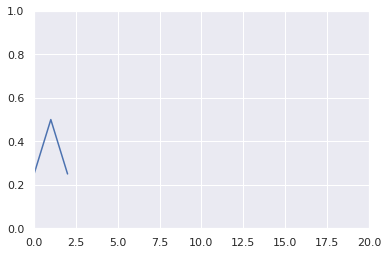

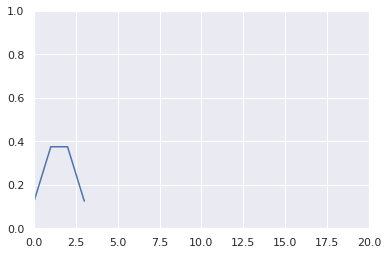

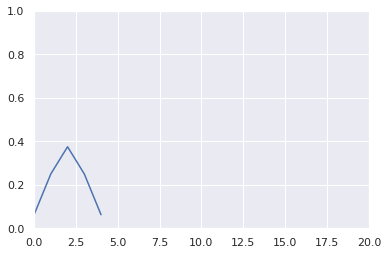

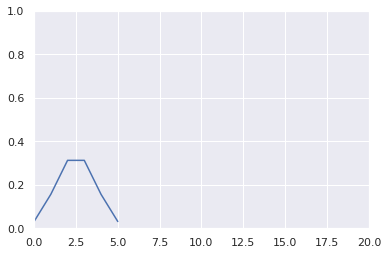

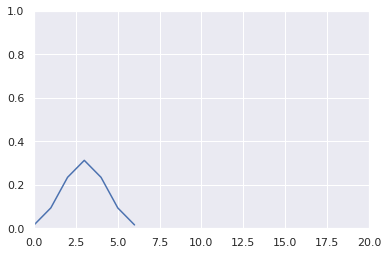

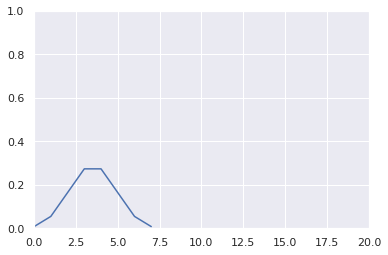

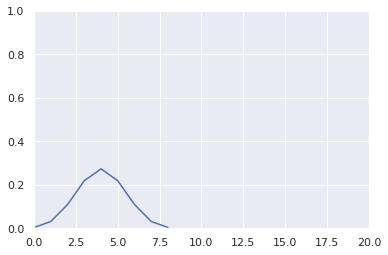

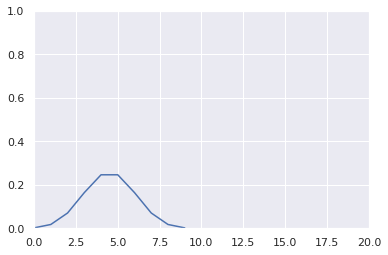

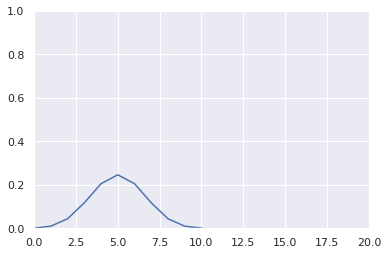

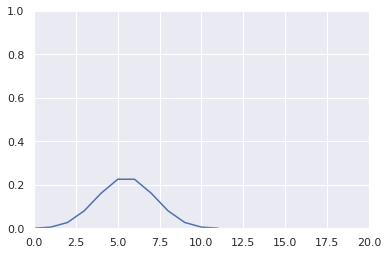

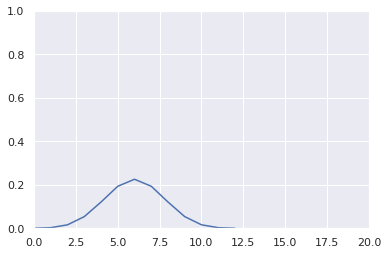

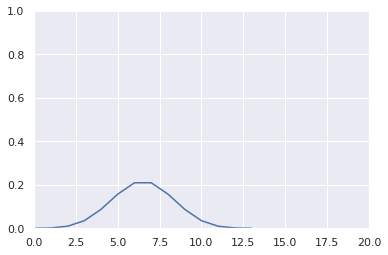

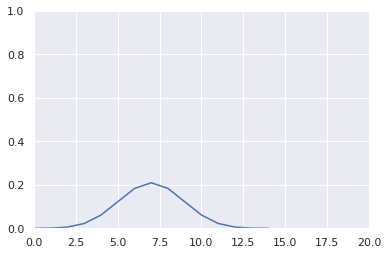

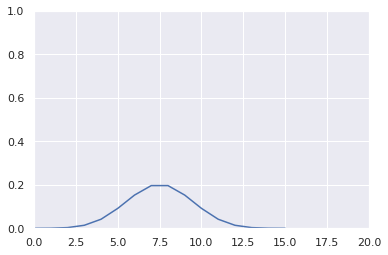

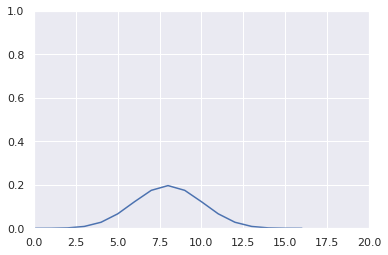

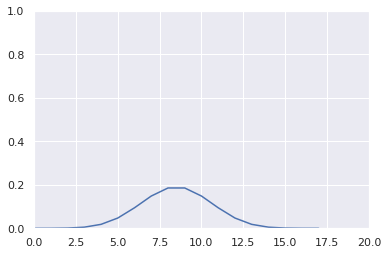

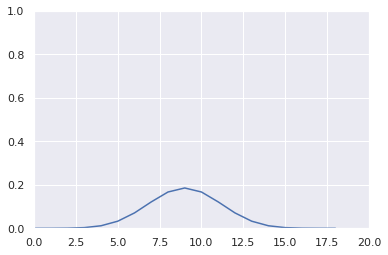

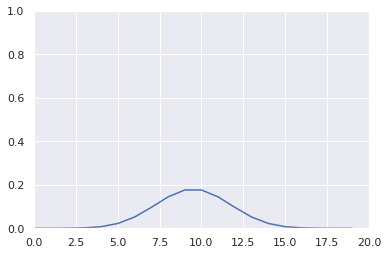

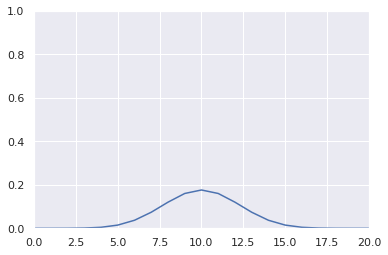

In [4]:
# 自由度 k
k = range(1, 20 + 1)

for i in k:
    # 二項分布オブジェクトを作成する.
    binomial_distribution = BinomialDistribution(i, 0.5)
    
    # この二項分布のグラフを描画する.
    binomial_distribution.draw_graph()

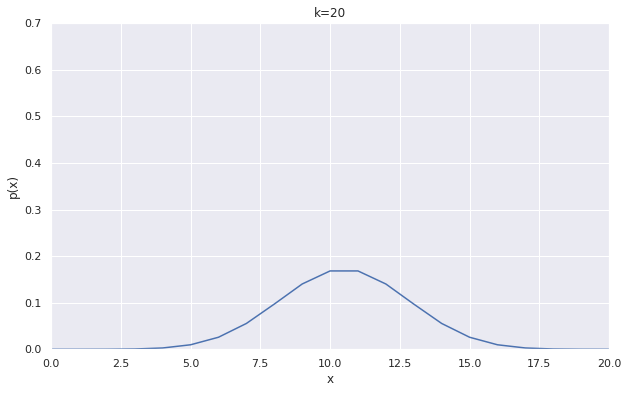

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from scipy.stats import norm
import seaborn as sns

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['IPAexGothic']

sns.set()
sns.set_style('darkgrid')

fig = plt.figure(figsize = (10, 6))

def update(a):
    
    if a != 0:
        plt.cla()
    
    # 自由度 k
    k = a+1
    
    binomial_distribution = BinomialDistribution(k, 0.5)
        
    x = np.arange(0, binomial_distribution.total + 1, 1)
    y = []
    for j in range(0, binomial_distribution.total + 1):
        y.append(binomial_distribution.get_probability_mass(j))
        
    plt.plot(x, y,c="b")
    
    plt.title('k=' + str(a))
    plt.xlabel('x')
    plt.ylabel('p(x)')
    plt.ylim(0, 0.7)
    plt.xlim(0, 20)

ani = animation.FuncAnimation(fig,
                              update,
                              interval=100,
                              frames = 21
                             )
dpi=100
ani.save('Binomial_dist.gif', writer='pillow')

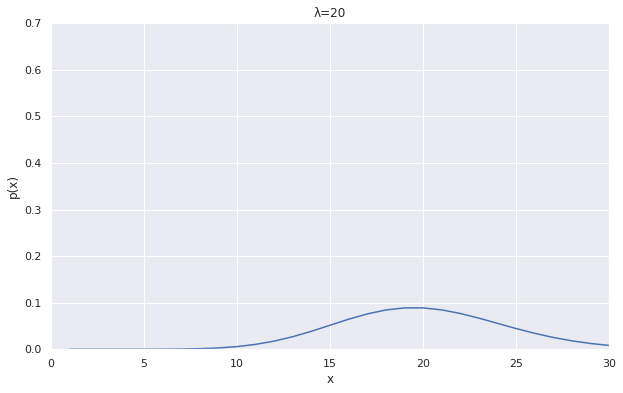

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from scipy.stats import norm
import seaborn as sns

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['IPAexGothic']

sns.set()
sns.set_style('darkgrid')

fig = plt.figure(figsize = (10, 6))

def poisson(k, lambda_):
    k = int(k)
    result = (lambda_**k) * (np.exp(-lambda_))  / np.math.factorial(k)
    return result

def update(a):
    
    if a != 0:
        plt.cla()
    
    # 自由度 k
    k = range(1, 21, 1)
        
    x =  np.arange(1, 41, 1)
    y = []
    for i in x:
        y.append(poisson(i, a))
        
    plt.plot(x, y,c="b")
    
    plt.title('λ=' + str(a))
    plt.xlabel('x')
    plt.ylabel('p(x)')
    plt.ylim(0, 0.7)
    plt.xlim(0, 30)

ani = animation.FuncAnimation(fig,
                              update,
                              interval=100,
                              frames = 21
                             )
dpi=100
ani.save('Poisson_dist.gif', writer='pillow')